In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
bfridaydf=pd.read_csv('blackfri.csv')
bfridaydf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,NaN,2,0,12,14.0,5.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
bfridaydf.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'],axis=1,inplace=True)
bfridaydf.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,NaN,0,12,14.0,5.0,1057
4,M,55+,16,C,0,8,NaN,NaN,7969


In [5]:
bfridaydf['City_Category']=bfridaydf['City_Category'].fillna('C')
bfridaydf.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,C,0,12,14.0,5.0,1057
4,M,55+,16,C,0,8,NaN,NaN,7969


In [6]:
bfridaydf['City_Category']=bfridaydf['City_Category'].map({
    'A':'Metro',
    'B':'Town',
    'C':'Village'
})
bfridaydf.head(10)

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,F,0-17,10,Metro,0,3,NaN,NaN,8370
1,F,0-17,10,Metro,0,1,6.0,14.0,15200
2,F,0-17,10,Metro,0,12,NaN,NaN,1422
3,F,0-17,10,Village,0,12,14.0,5.0,1057
4,M,55+,16,Village,0,8,NaN,NaN,7969
5,M,26-35,15,Metro,0,1,2.0,NaN,15227
6,M,46-50,7,Village,1,1,8.0,17.0,19215
7,M,46-50,7,Town,1,1,15.0,NaN,15854
8,M,46-50,7,Town,1,1,16.0,NaN,15686
9,M,26-35,20,Metro,1,8,NaN,14.0,7871


In [7]:
bfridaydf=bfridaydf.rename(columns={
    'Product_Category_1':'Baseball Caps',
    'Product_Category_2':'Wine Tumblers',
    'Product_Category_3':'Pet Raincoats'
})
bfridaydf.head(2)

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,F,0-17,10,Metro,0,3,NaN,NaN,8370
1,F,0-17,10,Metro,0,1,6.0,14.0,15200


In [8]:
bfridaydf['Marital_Status']=bfridaydf['Marital_Status'].map({
    1:'Married',
    0:'Un-married'
})
bfridaydf.head(10)

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,F,0-17,10,Metro,Un-married,3,NaN,NaN,8370
1,F,0-17,10,Metro,Un-married,1,6.0,14.0,15200
2,F,0-17,10,Metro,Un-married,12,NaN,NaN,1422
3,F,0-17,10,Village,Un-married,12,14.0,5.0,1057
4,M,55+,16,Village,Un-married,8,NaN,NaN,7969
5,M,26-35,15,Metro,Un-married,1,2.0,NaN,15227
6,M,46-50,7,Village,Married,1,8.0,17.0,19215
7,M,46-50,7,Town,Married,1,15.0,NaN,15854
8,M,46-50,7,Town,Married,1,16.0,NaN,15686
9,M,26-35,20,Metro,Married,8,NaN,14.0,7871


Baseball_Caps  1   2   3   4   5   8   12
Gender                                   
F               1   1   1   1   2   0   2
M               7   0   0   0   2   4   0


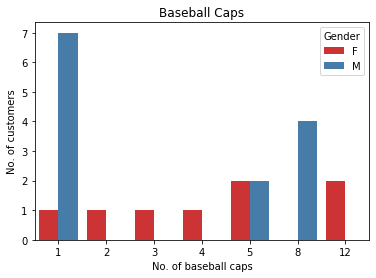

In [12]:
print(pd.crosstab(bfridaydf.Gender,bfridaydf.Baseball_Caps))
ax=sb.countplot(x='Baseball_Caps',hue='Gender',data=bfridaydf,palette='Set1')
ax.set(title='Baseball Caps',xlabel='No. of baseball caps',ylabel='No. of customers')
plt.show()

Wine_Tumblers  2.0   3.0   5.0   6.0   8.0   11.0  14.0  15.0  16.0
Gender                                                             
F                 0     1     1     1     1     0     2     0     0
M                 2     0     1     0     1     1     2     1     1


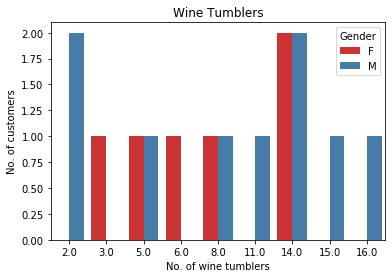

In [16]:
print(pd.crosstab(bfridaydf.Gender,bfridaydf.Wine_Tumblers))
ax=sb.countplot(x='Wine_Tumblers',hue='Gender',data=bfridaydf,palette='Set1')
ax.set(title='Wine Tumblers',xlabel='No. of wine tumblers',ylabel='No. of customers')
plt.show()

Pet_Raincoats  4.0   5.0   14.0  15.0  16.0  17.0
Gender                                           
F                 1     2     2     0     0     0
M                 0     1     3     1     1     1


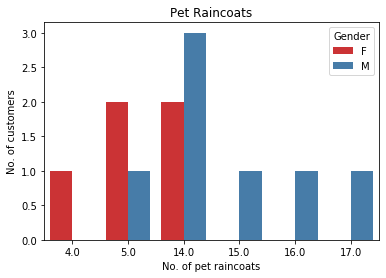

In [17]:
print(pd.crosstab(bfridaydf.Gender,bfridaydf.Pet_Raincoats))
ax=sb.countplot(x='Pet_Raincoats',hue='Gender',data=bfridaydf,palette='Set1')
ax.set(title='Pet Raincoats',xlabel='No. of pet raincoats',ylabel='No. of customers')
plt.show()

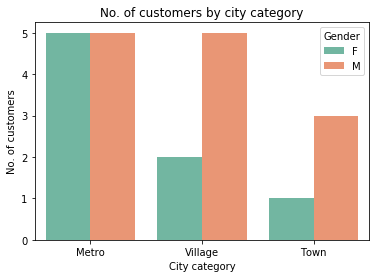

In [19]:
ax=sb.countplot(x='City_Category',hue='Gender',palette='Set2',data=bfridaydf)
ax.set(title='No. of customers by city category',xlabel='City category',ylabel='No. of customers')
plt.show()